# K-Means Application: Semi-supervised Learning

K-Means clustering algorithm can be used in semi-supervised learning.

In a semi-supervised learning problem we have plenty of unlabeled instances and very few labeled instances.


### Example: Photo-Hosting Service

As an example of semi-supervised learning, consider a photo-hosting service. 

It helps to tag each person on the photos by combining unsupervised and supervised learning.

In the unsupervised learning part, it takes all **unlabeled** photos. Then it clusters the photos to recognize that the same person X shows up in photos 3, 9, and 32, while another person Y shows up in photos 8, 22, and 87. 

Then, the system needs the label for these people. We assign labels manually and apply a supervised algorithm so that it can assign label for each person. 


## Tasks

We will use a handwritten digits dataset to perform semi-supervised learning.

- Step 1: Use K-Means algorithm to create $k$ clusters.
- Step 2: Identify $k$ representative images from the clusters (one image per cluster).
- Step 3: Manually label these $k$ images.
- Step 4: Perform classification using manually labeled $k$ representative images.


We perform Following experiments.

- Experiment 1: Classify the data using ALL labeled instances and compute accuracy.

- Experiment 2: Classify the data using only $k$ labeled instances and compute accuracy.

- Experiment 3: Perform semi-supervised learning for classification and compute accuracy.


Finally, we compare the accuracies and discuss some optimization techniques.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

## Dataset

We will use a handwritten digits dataset.

It has 1,797 images. 

Each image is grayscale 8 x 8 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

Thus, each image has **64 features**.

First, we load the data directly from cloud using Scikit-Learn.

In [2]:
X_digits, y_digits = load_digits(return_X_y=True)

print(X_digits.shape)

(1797, 64)


## Create Train and Test Dataset

We use sklearn's train_test_split function to spilt the dataset into training and test subsets. The data is shuffled by default before splitting.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

print("Dimension of X_train: ", X_train.shape)

Dimension of X_train:  (1347, 64)



## Experiment 1: Classify the Data using ALL Labeled Instances 

We train a Logistic Regression classifier with **ALL** labeled instances.

In [4]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

accuracy_labeled_data_all = log_reg.score(X_test, y_test)

print("Accuracy (all labeled Instances): %f" % (accuracy_labeled_data_all ))

Accuracy (all labeled Instances): 0.968889


## Experiment 2: Classify the Data using Only $k$ Labeled Instances

We train a Logistic Regression classifier with only $k = 50$ labeled instances.

In [5]:
n_labeled = 50

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)


accuracy_labeled_data = log_reg.score(X_test, y_test)

print("Accuracy (%d labeled Instances): %f" % (n_labeled, accuracy_labeled_data ))

Accuracy (50 labeled Instances): 0.833333


## Experiment 3: Perform Semi-Supervised Learning for Classification 

We perform semi-supervised learning by using the four steps mentioned earlier.

First we perform step 1 and 2.

- Step 1: Use K-Means algorithm to create $k$ clusters.
- Step 2: Identify $k$ representative images from the clusters (one image per cluster).

In [15]:
# Number of clusters
k = 50


# Step 1: Use K-Means algorithm to create $k$ clusters.
kmeans = KMeans(n_clusters=k, random_state=42)


# Step 2: Identify $k$ representative images from the clusters (one image per cluster).

'''
Step 2(a):
For each data compute distances from all centroids
    - There will be k number of columns for each data
'''

X_digits_dist = kmeans.fit_transform(X_train)

'''
Step 2(b):
Consider column 1 (it represents the distance to cluster center 1)
  - There are n distances to cluster center 1
  - Find the index of the data point that is closest to cluster center 1
Repeat this for k columns
We will get k data points (their indices) that are closest to the k cluster centers
In other words, these k data points are representative of the clusters
'''
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

'''
Step 2(c):
Using the indices of the k data points, get those data points
   These k data points are the new features

'''
X_representative_digits = X_train[representative_digit_idx]
yy = y_train[representative_digit_idx]

## Experiment 3: Visualize $k$ Representative Images

These images are not completely random instances.

Each of them is a representative image of its cluster.

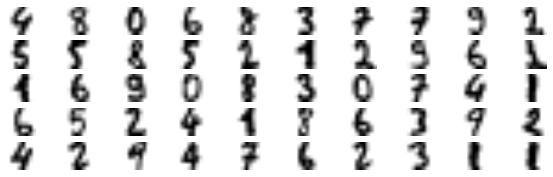

In [10]:
plt.figure(figsize=(10, 3))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')


plt.show()

## Experiment 3: Manually Label $k$ Representative Images

This is step 3 of semi-supervised learning.

In [18]:
import numpy
y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1])
numpy.unique(y_representative_digits, return_counts=True) 
#numpy.unique(y_train, return_counts=True) 
yy.reshape(5,10)

array([[4, 8, 0, 6, 8, 3, 7, 7, 9, 2],
       [5, 5, 8, 5, 2, 1, 2, 9, 6, 1],
       [1, 6, 9, 0, 8, 3, 0, 7, 4, 1],
       [6, 5, 2, 4, 1, 8, 6, 3, 9, 2],
       [4, 2, 9, 4, 7, 6, 2, 3, 1, 1]])

## Experiment 3: Train the Classifier Using $k$ Representative Images

This is step 4 of semi-supervised learning.

In [48]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)


accuracy_semi_supervised = log_reg.score(X_test, y_test)

print("Accuracy (%d representative images): %f" % (k, accuracy_semi_supervised))


reduction_in_error = 1 - (1 - accuracy_semi_supervised) / (1 - accuracy_labeled_data)
print("\nReduction in Error Rate: %f" %  reduction_in_error)

Accuracy (50 representative images): 0.922222

Reduction in Error Rate: 0.533333


## Observation: $k$ Labeled Instances

The error rate is reduced by more than 53%!


## Optimization Techniques

Note that we are still using only training the model on 50 instances. 

Since it's often costly and painful to label instances, especially when it has to be done manually by experts, it's a good idea to make them label representative instances rather than just random instances.

### Optimization Through Label Propagation

To improve the performance, we can propagate the labels to all the other instances in the same cluster.

In [45]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
y_train_propagated

array([0, 0, 0, ..., 9, 9, 9])

In [46]:
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
count = np.count_nonzero(y_train_propagated==y_train)
print('Number of True labeled: ', count)
print('Number of False labeled: ', len(y_train)-count)
y_train_propagated[0:300]

Number of True labeled:  1265
Number of False labeled:  82


array([5, 2, 0, 8, 7, 3, 7, 0, 2, 2, 3, 5, 8, 7, 3, 6, 5, 3, 9, 2, 5, 6,
       3, 0, 7, 1, 1, 9, 6, 1, 1, 0, 0, 2, 9, 8, 9, 9, 9, 7, 7, 1, 3, 5,
       4, 6, 1, 2, 1, 1, 8, 7, 6, 9, 2, 0, 4, 4, 8, 8, 7, 1, 3, 1, 7, 1,
       3, 5, 1, 7, 0, 0, 2, 2, 6, 9, 4, 1, 9, 0, 6, 7, 7, 9, 5, 1, 7, 0,
       7, 6, 8, 7, 1, 4, 6, 2, 8, 7, 5, 9, 0, 3, 9, 6, 6, 1, 9, 1, 2, 9,
       8, 9, 7, 9, 8, 5, 5, 9, 7, 7, 6, 8, 1, 3, 5, 7, 9, 5, 5, 2, 1, 1,
       2, 2, 4, 8, 7, 5, 8, 8, 9, 4, 9, 0, 1, 1, 8, 9, 8, 4, 2, 9, 1, 7,
       8, 3, 3, 2, 7, 6, 3, 0, 6, 5, 2, 8, 5, 7, 9, 0, 9, 5, 2, 2, 1, 4,
       1, 8, 2, 4, 1, 6, 2, 0, 8, 1, 0, 6, 9, 7, 9, 8, 2, 8, 2, 6, 9, 5,
       7, 1, 4, 8, 1, 2, 9, 8, 4, 8, 4, 0, 8, 5, 1, 8, 1, 5, 0, 3, 0, 2,
       4, 1, 1, 0, 3, 9, 2, 6, 0, 4, 6, 6, 9, 4, 0, 3, 1, 6, 6, 4, 1, 5,
       7, 4, 0, 5, 4, 8, 9, 7, 0, 4, 7, 6, 3, 3, 4, 8, 8, 1, 6, 5, 9, 3,
       2, 2, 1, 8, 2, 9, 6, 0, 4, 8, 0, 8, 2, 6, 2, 1, 6, 8, 8, 2, 6, 7,
       9, 5, 6, 9, 8, 8, 9, 4, 6, 4, 6, 1, 4, 0])

In [49]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)


accuracy_propagated_labels = log_reg.score(X_test, y_test)

print("Accuracy (propagated labels): %f" % (accuracy_propagated_labels))


reduction_in_error = 1 - (1 - accuracy_propagated_labels) / (1 - accuracy_semi_supervised)
print("\nReduction in Error Rate: %f" %  reduction_in_error)

Accuracy (propagated labels): 0.933333

Reduction in Error Rate: 0.142857


## Observation: Optimization Through Label Propagation

We have further reduced the error rate by more than 14%!

Can we do more optimization?

Notice that by propagating the labels to the full cluster, we have must have included some outliers. 

We could improve performance by propagating the labels only to the instances closest to the centroid.

### Optimization Through Partial Propagation of Labels

Let's only propagate the labels to the 20th percentile closest to the centroid.

In [51]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [54]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]



## Accuracy of the Partially Propagated Labels


In [55]:
propagation_accuracy = np.mean(y_train_partially_propagated == y_train[partially_propagated])

print("Accuracy of the labels in partial propagation: ", propagation_accuracy)

Accuracy of the labels in partial propagation:  0.9896907216494846


## Train the Logistic Regressor Using Partially Propagated Labels

In [15]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)


accuracy_propagated_labels_partially = log_reg.score(X_test, y_test)

print("Accuracy (propagated labels): %f" % (accuracy_propagated_labels_partially))


reduction_in_error = 1 - (1 - accuracy_propagated_labels_partially) / (1 - accuracy_propagated_labels)
print("\nReduction in Error Rate: %f" %  reduction_in_error)

Accuracy (propagated labels): 0.940000

Reduction in Error Rate: 0.100000


## Observation: Optimization Through Partially Propagated Labels

We have further reduced the error rate by 10%!

With just 50 labeled instances (just 5 examples per class on average!), we got 94% performance, which is pretty close to the performance of logistic regression on the fully labeled digits dataset (which was 96.9%).

This is because the propagated labels are actually pretty good: their accuracy is very close to 99%.


## More Optimization?

We could now do a few iterations of active learning:

- Manually label the instances that the classifier is least sure about, if possible by picking them in distinct clusters.
- Train a new model with these additional labels.